In [1]:
# !pip freeze > requirements.txt

In [2]:
import json
import os
from collections import defaultdict
import pickle
import json
from tqdm.auto import tqdm
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import torch 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device is", device)

device is cuda


# Preprocess

In [3]:
%run preprocess.py

/media/michael/Fichiers/Fac/Thèse 1/Code/Scripts/preprocess.py:207: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_materiel = pd.read_csv(csv_file, sep=";")


53088 Preprocess done
             Coord X       Coord Y         Month           Day          Hour  \
count   53088.000000  5.308800e+04  53088.000000  53088.000000  53088.000000   
mean   566938.590288  6.271233e+06      6.453191    180.592413     13.265559   
std     19582.304424  2.010151e+04      3.405320    104.084457      6.205673   
min    492349.270000  6.183029e+06      1.000000      1.000000      0.000000   
25%    564683.750000  6.266237e+06      4.000000     91.000000      9.000000   
50%    572270.980000  6.277611e+06      6.000000    179.000000     14.000000   
75%    575489.475000  6.281235e+06      9.000000    270.000000     18.000000   
max    624065.210000  6.312665e+06     12.000000    365.000000     23.000000   

             Minute      Duration      Incident  
count  53088.000000  53088.000000  53088.000000  
mean      29.367390     86.686671     11.157851  
std       17.266883     48.725003     12.897099  
min        0.000000     11.000000      1.000000  
25%    

# Train

In [57]:
os.getcwd()

'/media/michael/Fichiers/Fac/Thèse 1/Code/Scripts'

In [11]:
os.chdir("../")

In [33]:
%run train.py --lr 0.0025 --layers 1024 --num_timesteps 1000 --is_y_cond --save_as 'dqn_test' 

Index(['Coord X', 'Coord Y', 'Month', 'Day', 'Hour', 'Minute', 'Duration',
       'Incident'],
      dtype='object')
Index(['Month_sin', 'Month_cos', 'Hour_sin', 'Hour_cos', 'Day_sin', 'Day_cos',
       'Coord X', 'Coord Y', 'Duration', 'Incident', 'Month', 'Day', 'Hour',
       'Minute'],
      dtype='object')
Index(['Month_sin', 'Month_cos', 'Hour_sin', 'Hour_cos', 'Day_sin', 'Day_cos',
       'Coord X', 'Coord Y', 'Duration', 'Incident'],
      dtype='object')
K [0]
features 9
{'d_in': np.int64(9), 'is_y_cond': True, 'num_classes': 56, 'rtdl_params': {'d_layers': [1024, 1024], 'dropout': 0.0}, 'dim_t': 128}
mlp
label embedding Embedding(56, 128)
diffusion ready
Model trained


# Sample

In [12]:
# %run sample.py --load_as 'dqn_test' --save_sample_as "df_fake.pkl" --to_keep 40 --value_span 100

os factor: 3 sample batch size: 8192 variability: 0.02
[0]
features 9
{'d_in': np.int64(9), 'is_y_cond': True, 'num_classes': 56, 'rtdl_params': {'d_layers': [1024, 1024], 'dropout': 0.0}, 'dim_t': 128}
mlp
label embedding Embedding(56, 128)
params loaded
diffusion ready
Index(['area_name', 'count', 'new_samples', 'perc.', 'delta'], dtype='object')
new samples OK
(53088, 14)
Index(['Coord X', 'Coord Y', 'Duration', 'Day', 'Month', 'Hour', 'Incident',
       'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos', 'Hour_sin', 'Hour_cos',
       'area_name'],
      dtype='object')
dataset sampled


In [3]:
for i in range(10):
    print("iteration", i)
    filename = f"df_fake_{i}.pkl"
    
    process = subprocess.Popen(
        ["python", "sample.py", 
         "--load_as", 'dqn_test', 
         "--save_sample_as", filename, 
         "--os_factor", "3", 
         "--to_keep", "40", 
         "--value_span", "100"],
        stdout=subprocess.PIPE,
        stderr=subprocess.STDOUT,
        text=True,
        bufsize=1  # pour forcer le flush ligne par ligne
    )

    # process.wait() # évite le lazy

    line_count = 0
    for line in process.stdout:
        line_count += 1
        if line_count % 50 == 0:
            clear_output(wait=True)
    
        print(line.strip())

    print(f"--- {filename} done---\n")

iteration 0
os factor: 3 sample batch size: 8192 variability: 0.02
[0]
features 9
{'d_in': np.int64(9), 'is_y_cond': True, 'num_classes': 56, 'rtdl_params': {'d_layers': [1024, 1024], 'dropout': 0.0}, 'dim_t': 128}
mlp
label embedding Embedding(56, 128)
params loaded
diffusion ready
Index(['area_name', 'count', 'new_samples', 'perc.', 'delta'], dtype='object')
new samples OK
(53088, 14)
Index(['Coord X', 'Coord Y', 'Duration', 'Day', 'Month', 'Hour', 'Incident',
'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos', 'Hour_sin', 'Hour_cos',
'area_name'],
dtype='object')
dataset sampled
--- df_fake_0.pkl done---

iteration 1
os factor: 3 sample batch size: 8192 variability: 0.02
[0]
features 9
{'d_in': np.int64(9), 'is_y_cond': True, 'num_classes': 56, 'rtdl_params': {'d_layers': [1024, 1024], 'dropout': 0.0}, 'dim_t': 128}
mlp
label embedding Embedding(56, 128)
params loaded
diffusion ready
Index(['area_name', 'count', 'new_samples', 'perc.', 'delta'], dtype='object')
new samples OK
(53088, 14

In [ ]:
os.getcwd()

In [ ]:
os.chdir("./Scripts/")

In [ ]:
os.chdir("../")

# Generate environment

In [35]:
%%time

%run generate_environment.py --sample_list df_fake_0.pkl --save_as "df_pc_fake_1y.pkl"

is probabilistic departure False


/media/michael/Fichiers/Fac/Thèse 1/Code/Scripts/generate_environment.py:443: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_materiel = pd.read_csv("materiel_2018.csv", sep=";")
/media/michael/Fichiers/Fac/Thèse 1/Code/Scripts/generate_environment.py:449: DtypeWarning: Columns (22,23,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df_lieu = pd.read_csv("dbo.LIEU.csv", sep=";")


window: 53088
start_year 2018 start_inter 1 end_inter 53088
362 197
Day
1      219
2      133
3      154
4      165
5      126
      ... 
361    106
362     86
363    130
364    131
365    138
Name: count, Length: 365, dtype: int64
real 106176 done
start_year 2018 start_inter 1 end_inter 53088
(53088, 18)
(53088, 19)
20 282
Day
1      154
2      149
3      192
4      190
5      191
      ... 
361    140
362    135
363    123
364    121
365     98
Name: count, Length: 365, dtype: int64
(53088, 21)
(106176, 18)
df_fake_0.pkl 106176 done
Index(['num_inter', 'date', 'PDD', 'departure', 'zone', 'Duration', 'Month',
       'Day', 'Hour', 'Minute', 'Coord X', 'Coord Y', 'Month_sin', 'Month_cos',
       'Day_sin', 'Day_cos', 'Hour_sin', 'Hour_cos'],
      dtype='object')
global fake done 106176
Planning done
CPU times: user 4min 18s, sys: 730 ms, total: 4min 19s
Wall time: 4min 19s


In [ ]:
#--prob_dep

In [ ]:
# %run generate_environment.py 

In [ ]:
os.getcwd()

# Simulation

In [ ]:
os.chdir('../')

In [ ]:
os.getcwd()

In [ ]:
dic_tarif = {'v_required': 0,
            'v_sent': 100,
            'v_degraded':0,
            'function_cancelled':0, #cancel departure
            'function_not_found':0,
            'v1_not_sent_from_1st_station':0,
            'v_not_found_in_last_station':0,
            'ff_required':0,
            'ff_sent':0,
            'ff_skill_mean':0,
            'z1_sent': 0
            }

os.chdir('./Reward_weights')
json.dump(dic_tarif, open("reward_weights.json", "w"))
os.chdir('../')

In [ ]:
%%time

%run simulation_start.py \
--dataset "df_pc_real.pkl" \
--start 1 \
--end 202 \
--constraint_factor 3 \
--reward_weights reward_weights.json \
--save_metrics_as "sim_test"


In [ ]:
os.chdir('../')

In [ ]:
os.getcwd()

# Agent params

In [ ]:
state_shape = (70,40)
action_size = 70
train_seed = 41

os.chdir("./Data")

hyper_params = {"state_size" : 70*40,
                "action_size" : action_size,
                "layer_size" : 1024,
                "buffer_size" : 5000, #100000, 128, 5000, 10000, 65 buffer_size > batch_size
                "batch_size" : 256, #512, 256, 64, 32, 16, 8
                "update_every" : 32, #1, 200, 500, 64, 32
                "per" : 1, # 0 for curiosity > 0, else 1, 2
                "rdm" : 0, # only if not per
                "munchausen" : 1, #1
                "curiosity" : 0, #Adds intrinsic curiosity to the extrinsic reward. 0 - only reward/ no curiosity, 
                                                                                    #1 - reward and curiosity, 
                                                                                    #2 - only curiosity
                "curiosity_size" : 1024,
                "n_steps" : 64, #5, 1, 50, 64
                "noisy" : 0,
                "lr" : 1e-3, #1e-3, 5e-4, 5e-3
                "lr_dec" : 0, #0, 1, 2, 3
                "entropy_tau" : 0.03, #0.03, 0.05 idem #-  Munch param
                "entropy_tau_coeff" : 1e-2, #1e-2 #-  Munch param
                "lo" : -1, #-  Munch param
                "alpha" : 0.9, #-  Munch param
                "gamma" : 0.99,
                "tau" : 0.005, #1e-2, 5e-3
                "N" : 32,# Number of quantiles 32, 64
                "entropy_coeff" : 0.001,
                "device" : str(device),
                "seed" : train_seed}


json.dump(hyper_params, open("hyper_params.json", "w"))

os.chdir("../")

In [ ]:
os.chdir("./Scripts")

In [ ]:
os.getcwd()

In [ ]:
os.chdir("../")

In [ ]:
# 159264

# Agent train

In [232]:
%%time

%run agent_run.py \
--model_name model_a \
--hyper_params hyper_params.json \
--dataset df_pc_fake.pkl \
--start 1 \
--end 100 \
--constraint_factor 3 \
--reward_weights reward_weights.json \
--save_metrics_as metrics_a

lr decay: 1 decay_update: 100 PER 1
Dueling_QNetwork(
  (fc1): Linear(in_features=3280, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=1024, bias=True)
  (V): Linear(in_features=1024, out_features=1, bias=True)
  (A): Linear(in_features=1024, out_features=80, bias=True)
)
Agent initialized
Train mode


FileNotFoundError: [Errno 2] No such file or directory: 'reward_weights.json'

CPU times: user 147 ms, sys: 26 ms, total: 173 ms
Wall time: 258 ms


# Agent test

In [ ]:
%%time

%run agent_run.py 
--model_name model_a \
--hyper_params hyper_params.json \
--dataset df_pc_real.pkl \
--start 1 \
--end 159264 \
--constraint_factor 3 \
--reward_weights reward_weights.json \
--save_metrics_as metrics_a \
--eps_fixed

# Plot

In [ ]:
# vehicle_agent_real.npy

In [ ]:
os.getcwd()

In [ ]:
os.chdir("./Plots")

In [ ]:
os.chdir("../")

In [ ]:
%%time

%run plot_evo.py sim_v_sent_100_2_vehicle_real.npy vehicle_agent_real.npy 

In [ ]:
os.getcwd()

# Stats

In [ ]:
df_pc = pd.read_pickle(dataset)

In [ ]:
os.chdir('./Plots')

In [ ]:
dic_indic_agent = load(open('dic_indic_agent.pkl', 'rb'))
dic_indic_simulation = load(open('dic_indic_simulation.pkl', 'rb'))

In [ ]:
# best

dic_sum_simulation = reduce_dic(dic_indic_simulation)
dic_sum_simulation

In [ ]:
# random

dic_sum_simulation = reduce_dic(dic_indic_simulation)
dic_sum_simulation

In [ ]:
dic_sum_agent = reduce_dic(dic_indic_agent)
dic_sum_agent

In [ ]:
%%time

%run agent_baseline.py --hyper_params hyper_params.json --dataset "df_pc_fake.pkl" --eps_update 4000

In [ ]:
os.chdir("../")


In [ ]:
%%time

%run agent_test.py --hyper_params hyper_params.json --dataset "df_pc_fake.pkl" --eps_fixed True --eps_update 4000

In [ ]:
%%time

%run agent_run.py --hyper_params hyper_params.json --dataset "df_pc_fake.pkl" --eps_update 4000 --eps_fixed False

In [ ]:
vehicle_evo_real = vehicle_evo
np.save("vehicle_evo_real.npy", vehicle_evo_real)

%run plot_evo.py --vehicle_evo_fake True --vehicle_evo_real True

In [ ]:
os.getcwd()

In [ ]:
os.chdir('./Scripts')

In [ ]:
os.chdir('./Data_environment')

In [ ]:
# sim best all metrics
# sim rand all metrics
# agent train.test all metrics

# TEST

In [19]:
os.chdir('./Data')

csv_file = "inters.csv"
df_inter = pd.read_csv(csv_file, sep=";")

In [20]:
df_inter.head()

,IU de l'intervention,Numéro d'intervention,Date Heure Début Intervention,Date Heure fin Intervention,Date Heure premier départ,Date Heure 1er arrivée sur les lieux,Date Heure Dernier Retour Personnel,Date Heure Dernier Retour Engin,Sinistre initial - IU,Sinistre initial - Nom,Sinistre initial - Famille,Sinistre initial - Categorie,Localisation initiale - Coord X,Localisation initiale - Coord Y,Localisation initiale - Secteur Geo lié à la Commune
0,00000001-18-1-1,1,01/01/2018 00:05:21,01/01/2018 01:01:47,01/01/2018 00:09:51,01/01/2018 00:13:07,01/01/2018 01:00:58,01/01/2018 01:00:58,395.0,U1 MALAISE DANS UN ERP,MALAISE - MALADIE,SECOURS A VICTIMES,573603.00,6280852.00,URBAIN
1,00000002-18-1-1,2,01/01/2018 00:11:43,01/01/2018 00:44:46,01/01/2018 00:14:15,NaN,01/01/2018 00:43:07,01/01/2018 00:43:07,221.0,AUTRES FEUX EN PLEIN AIR (SANS PRÉCISION),AUTRES INCENDIES,INCENDIE,558522.00,6263928.00,*
2,00000003-18-1-1,3,01/01/2018 00:13:35,01/01/2018 00:37:34,01/01/2018 00:15:38,NaN,01/01/2018 00:37:27,01/01/2018 00:37:27,397.0,U1 MALAISE SUR VOIE PUBLIQUE,MALAISE - MALADIE,SECOURS A VICTIMES,574303.92,6279553.02,URBAIN
3,00000004-18-1-1,4,01/01/2018 00:13:46,01/01/2018 03:00:34,01/01/2018 00:21:32,01/01/2018 00:27:50,01/01/2018 02:59:49,01/01/2018 02:59:49,359.0,EU MALAISE GRAVE A DOMICILE,MALAISE - MALADIE,SECOURS A VICTIMES,571710.67,6305442.28,*
4,00000005-18-1-1,5,01/01/2018 00:14:53,01/01/2018 00:55:25,01/01/2018 00:18:37,01/01/2018 00:27:13,01/01/2018 00:55:07,01/01/2018 00:55:07,387.0,U1 MALAISE A DOMICILE,MALAISE - MALADIE,SECOURS A VICTIMES,569896.00,6265672.00,*


In [28]:
frmt = '%d/%m/%Y %H:%M:%S'
df_inter['heure_debut'] = df_inter['Date Heure Début Intervention']
df_inter['heure_debut'] = pd.to_datetime(df_inter['heure_debut'], format=frmt)
df_inter['heure_debut'] = df_inter['heure_debut'].dt.floor('s')
# s = pd.Series(df_inter['heure_debut'].values.astype(np.float32))
# s[s<0] = np.nan
# df_inter['heure_debut'] = pd.to_datetime(s.interpolate())


df_inter["minute"] = df_inter["heure_debut"].dt.minute

In [29]:
df_inter[["Date Heure Début Intervention", 'heure_debut', "minute"]].head()

,Date Heure Début Intervention,heure_debut,minute
0,01/01/2018 00:05:21,2018-01-01 00:05:21,5
1,01/01/2018 00:11:43,2018-01-01 00:11:43,11
2,01/01/2018 00:13:35,2018-01-01 00:13:35,13
3,01/01/2018 00:13:46,2018-01-01 00:13:46,13
4,01/01/2018 00:14:53,2018-01-01 00:14:53,14


In [7]:
os.chdir("../")

In [2]:
os.chdir("./Data_preprocessed/")

In [4]:
df_real = pickle.load(open('df_real.pkl', 'rb'))

In [5]:
df_real

,Coord X,Coord Y,Month,Day,Hour,Duration,Incident
0,573603.00,6280852.00,1,1,0,54.0,4
1,558522.00,6263928.00,1,1,0,32.0,17
2,574303.92,6279553.02,1,1,0,25.0,7
3,571710.67,6305442.28,1,1,0,167.0,26
4,569896.00,6265672.00,1,1,0,41.0,1
...,...,...,...,...,...,...,...
53083,513670.00,6226244.00,12,365,23,61.0,1
53084,518810.37,6218557.52,12,365,23,80.0,13
53085,583285.69,6288301.82,12,365,23,66.0,4
53086,569293.93,6282654.81,12,365,23,87.0,4


In [2]:
os.chdir("./Data_environment/")
df_skills = pd.read_pickle("df_skills.pkl")
df_skills

Compétence ***COD1        ***COD2               ***COD6              ***COND_  \
             Début Fin      Début        Fin      Début        Fin      Début   
Matricule                                                                       
1001           NaT NaT        NaT        NaT        NaT        NaT 1989-04-17   
1007           NaT NaT        NaT        NaT        NaT        NaT        NaT   
1008           NaT NaT        NaT        NaT        NaT        NaT        NaT   
1010           NaT NaT        NaT        NaT        NaT        NaT        NaT   
1014           NaT NaT 2003-04-01 2018-08-02 2003-04-01 2018-08-02        NaT   
...            ...  ..        ...        ...        ...        ...        ...   
12146          NaT NaT        NaT        NaT        NaT        NaT        NaT   
12147          NaT NaT        NaT        NaT        NaT        NaT        NaT   
12150          NaT NaT        NaT        NaT        NaT        NaT        NaT   
12151          NaT NaT        NaT        NaT        NaT        NaT        NaT   
12159          NaT NaT        NaT        NaT        NaT        NaT        NaT   

Compétence            ***CO_AM      ... USAR_CTRB     USAR_CUNITE             \
                  Fin    Début Fin  ...     Début Fin       Début        Fin   
Matricule                           ...                                        
1001       2100-01-01      NaT NaT  ...       NaT NaT         NaT        NaT   
1007              NaT      NaT NaT  ...       NaT NaT         NaT        NaT   
1008              NaT      NaT NaT  ...       NaT NaT  2012-09-01 2100-01-01   
1010              NaT      NaT NaT  ...       NaT NaT         NaT        NaT   
1014              NaT      NaT NaT  ...       NaT NaT         NaT        NaT   
...               ...      ...  ..  ...       ...  ..         ...        ...   
12146             NaT      NaT NaT  ...       NaT NaT         NaT        NaT   
12147             NaT      NaT NaT  ...       NaT NaT         NaT        NaT   
12150             NaT      NaT NaT  ...       NaT NaT         NaT        NaT   
12151             NaT      NaT NaT  ...       NaT NaT         NaT        NaT   
12159             NaT      NaT NaT  ...       NaT NaT         NaT        NaT   

Compétence    USAR_EQ            VETERINAIRE SP         TOUTES             
                Début        Fin          Début Fin      Début        Fin  
Matricule                                                                  
1001              NaT        NaT            NaT NaT 1984-11-10 2100-01-01  
1007              NaT        NaT            NaT NaT 1984-07-17 2100-01-01  
1008              NaT        NaT            NaT NaT 2012-09-01 2100-01-01  
1010              NaT        NaT            NaT NaT 2012-09-01 2100-01-01  
1014       2012-09-01 2100-01-01            NaT NaT 1983-09-19 2100-01-01  
...               ...        ...            ...  ..        ...        ...  
12146             NaT        NaT            NaT NaT 2016-06-06 2100-01-01  
12147             NaT        NaT            NaT NaT 2018-06-04 2100-01-01  
12150             NaT        NaT            NaT NaT 2012-03-17 2100-01-01  
12151             NaT        NaT            NaT NaT 2010-04-20 2100-01-01  
12159             NaT        NaT            NaT NaT 2002-09-16 2100-01-01  

[3343 rows x 268 columns]

In [9]:
eps = 1
d = 1
for _ in range(22):
    eps = eps * 0.99**d
    eps = max(0.05, eps)
    d+=1
    print(_, eps)

0 0.99
1 0.9702989999999999
2 0.9414801494009999
3 0.9043820750088043
4 0.8600583546412882
5 0.8097278682212583
6 0.7547192872036325
7 0.6964132180495735
8 0.6361854860638709
9 0.5753547499769284
10 0.5151371174238033
11 0.4566097477439145
12 0.4006846529515405
13 0.348093114492442
14 0.2993803913123313
15 0.2549097606963092
16 0.21487444770607947
17 0.1793156835947105
18 0.14814499154757946
19 0.12116881635704835
20 0.0981137673636859
21 0.07865099717364833


<BarContainer object of 365 artists>

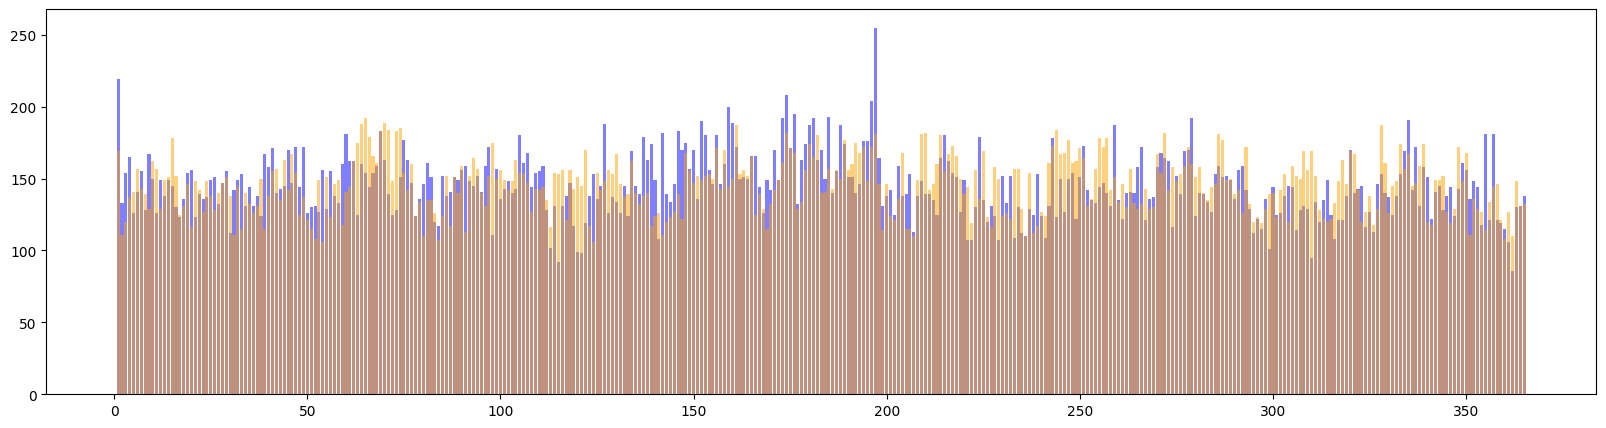

In [208]:
vcreal = df_real.Day.value_counts().sort_index()
df_fake.loc[df_fake["Day"] < 1, "Day"] = 1
vcfake = df_fake.Day.value_counts().sort_index()

plt.figure(figsize = (20, 5))
plt.bar(vcreal.index, vcreal.values, color='blue', alpha = .5)
plt.bar(vcfake.index, vcfake.values, color='orange', alpha = .5)

In [21]:
df_real.columns

Index(['Coord X', 'Coord Y', 'Month', 'Hour', 'Duration', 'Incident',
       'Day_week', 'Day_month', 'area_name'],
      dtype='object')

<BarContainer object of 12 artists>

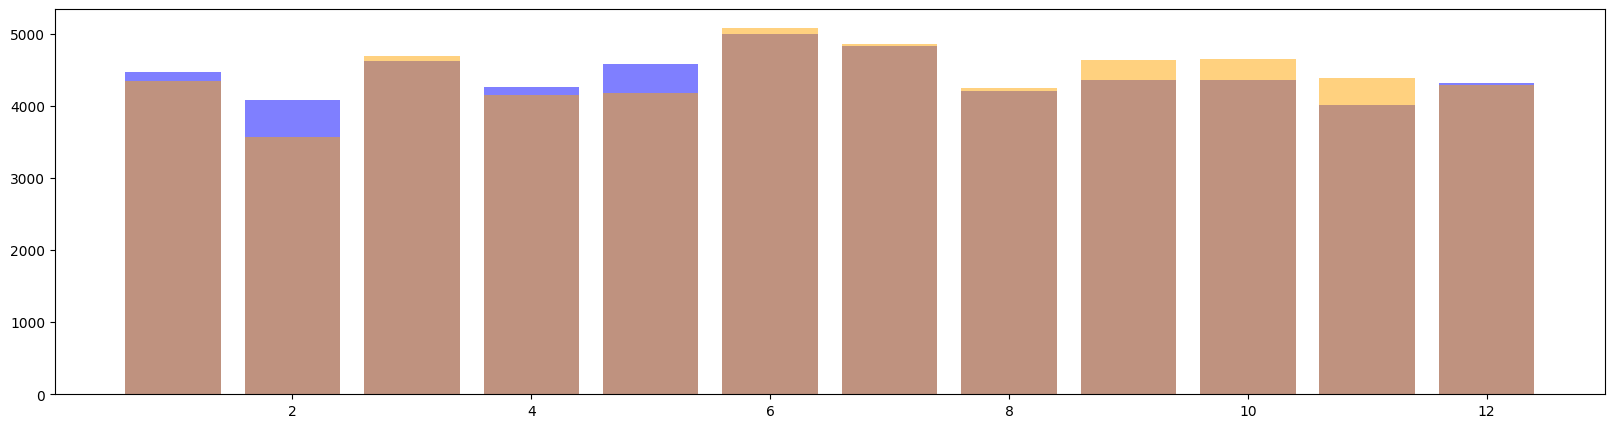

In [210]:
vcreal = df_real.Month.value_counts().sort_index()
df_fake.loc[df_fake["Month"] < 1 , "Month"] = 12
vcfake = df_fake.Month.value_counts().sort_index()
plt.figure(figsize = (20, 5))
plt.bar(vcreal.index, vcreal.values, color='blue', alpha = .5)
plt.bar(vcfake.index, vcfake.values, color='orange', alpha = .5)

<BarContainer object of 24 artists>

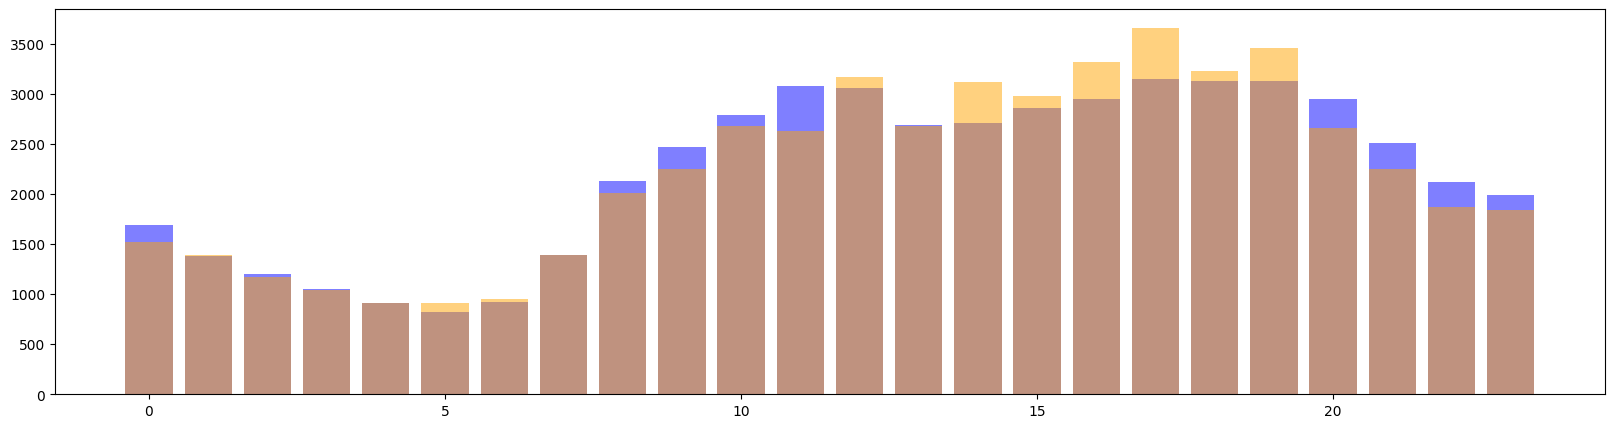

In [212]:
vcreal = df_real.Hour.value_counts().sort_index()
df_fake.loc[df_fake["Hour"] > 23, "Hour"] = 0
vcfake = df_fake.Hour.value_counts().sort_index()
plt.figure(figsize = (20, 5))
plt.bar(vcreal.index, vcreal.values, color='blue', alpha = .5)
plt.bar(vcfake.index, vcfake.values, color='orange', alpha = .5)

In [34]:
os.chdir("../Data_environment")

In [35]:
df_fake = pickle.load(open('df_pc_fake.pkl', 'rb'))

<BarContainer object of 366 artists>

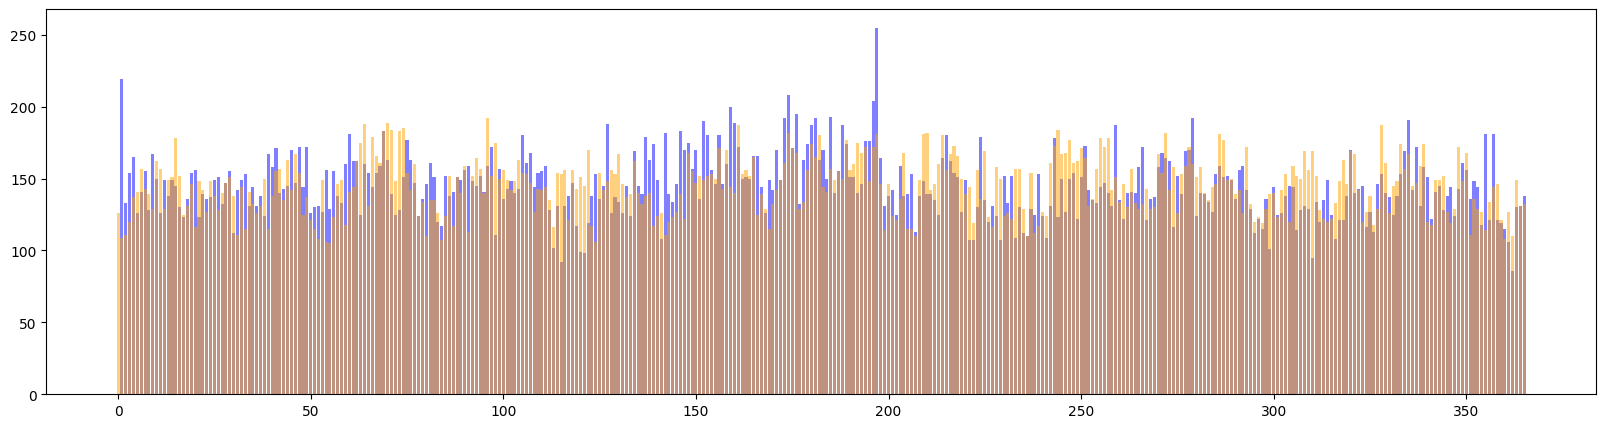

In [191]:
# vcreal = df_real.Day.value_counts().sort_index()
vcfake = df_fake.Day.value_counts().sort_index()
plt.figure(figsize = (20, 5))
plt.bar(vcreal.index, vcreal.values, color='blue', alpha = .5)
plt.bar(vcfake.index, vcfake.values, color='orange', alpha = .5)